# 데이터

- 케라스는 딥러닝 학습에 필요한 데이터를 쉽게 내려받을 수 있음.
- load_data() 함수 제공

In [3]:
# 그래프 한글 표시 
# 나눔 폰트 설치 후 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 후 진행하기

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (3,879 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 그래프 한글 설정
plt.rc('font' , family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = 20, 10

In [2]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

In [6]:
# 학습 : 테스트 나누기
# num_words : 빈도가 1~1000에 해당하는 단어만 선택
# 20%만 테스트 데이터
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000, test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [9]:
# 데이터 확인
# 0부터 시작하니까 +1 
cg = np.max(y_train) + 1
print('카테고리:            ', cg)
print('학습용 뉴스기사:     ', len(X_train))
print('테스트용 뉴스기사:   ', len(X_test))
# 테스트로 출력
print(X_train[0])

카테고리:             46
학습용 뉴스기사:      8982
테스트용 뉴스기사:    2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [14]:
# 기사의 단어 수가 제각각 다름. 동일하게 맞춰야함.
# 데이터 전처리 함수 : sequence()사용
from tensorflow.keras.preprocessing import sequence

# 단어의 수 맞춘다.
# 100개로 맞추고 부족한 부분은 0으로 채워짐
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [16]:
# 학습
print(X_train[0])
print(len(X_train[0]))
print('============================')
# 테스트
print(X_test[0])
print(len(X_test[0]))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   2   8  43
  10 447   5  25 207 270   5   2 111  16 369 186  90  67   7  89   5  19
 102   6  19 124  15  90  67  84  22 482  26   7  48   4  49   8 864  39
 209 154   6 151   6  83  11  15  22 155  11  15   7  48   9   2   2 504
   6 258   6 272  11  15  22 134  44  11  15  16   8 197   2  90  67  52
  29 209  30  32 132   6 109  15  17  12]
100
[  5   2   7 748  48   9   2   7 207   2 966   2 793  97 133 336   7   4
 493  98 273 104 284  25  39 338  22 905 220   2 644  59  20   6 119  61
  11  15  58 579  26  10  67   7   4 738  98  43  88 333 722  12  20   6
  19 746  35  15  10   9   2 855 129 783  21   4   2 244 364  51  16 299
 452  16 515   4  99  29   5   4 364 281  48  10   9   2  23 644  47  20
 324  27  56   2   2   5 192 510  17  12]
100


In [18]:
# 결과 데이터 원 핫 인코딩
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# 딥러닝 구조 - LSTM 

## LSTM : RNN에서 기억 값에 대한 가중치를 제어
- LSTM(기사당 단어 수, 기타 옵션)
- 활성화 함수 : tanh

In [20]:
# 다중 분류
loss_function = 'categorical_crossentropy'
activation_function = 'softmax'

In [19]:
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어, RNN ( LSTM )
from tensorflow.keras.layers import Dense, LSTM, Embedding
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
model = Sequential()

# 데이터 전처리과정을 통해 입력된 값을 받아 다음층이 알 수 있는 형태로 변환.
# Embadding('불러온단어의 총 수', '기사당 단어 수')
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))

# 출력층
model.add(Dense(46, activation= activation_function))

# 모델 실행옵션
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         100000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 조기 중단 설정
es = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=es)

Epoch 1/200
450/450 [==============================] - 45s 91ms/step - loss: 2.2292 - accuracy: 0.4361 - val_loss: 1.9632 - val_accuracy: 0.5102
Epoch 2/200
450/450 [==============================] - 40s 89ms/step - loss: 1.7685 - accuracy: 0.5511 - val_loss: 1.7060 - val_accuracy: 0.5663
Epoch 3/200
450/450 [==============================] - 40s 89ms/step - loss: 1.6075 - accuracy: 0.5880 - val_loss: 1.5681 - val_accuracy: 0.6002
Epoch 4/200
450/450 [==============================] - 40s 89ms/step - loss: 1.4342 - accuracy: 0.6374 - val_loss: 1.4353 - val_accuracy: 0.6496
Epoch 5/200
450/450 [==============================] - 42s 93ms/step - loss: 1.2641 - accuracy: 0.6859 - val_loss: 1.3158 - val_accuracy: 0.6705
Epoch 6/200
450/450 [==============================] - 40s 90ms/step - loss: 1.1507 - accuracy: 0.7099 - val_loss: 1.2666 - val_accuracy: 0.6745
Epoch 7/200
450/450 [==============================] - 41s 90ms/step - loss: 1.0552 - accuracy: 0.7335 - val_loss: 1.1955 - val_ac

In [28]:
# 테스트 데이터 정확도
print('Test 정확도 : %.4f'%(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 2s 30ms/step - loss: 1.2018 - accuracy: 0.7173
Test 정확도 : 0.7173


In [30]:
# 검증셋, 학습셋 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

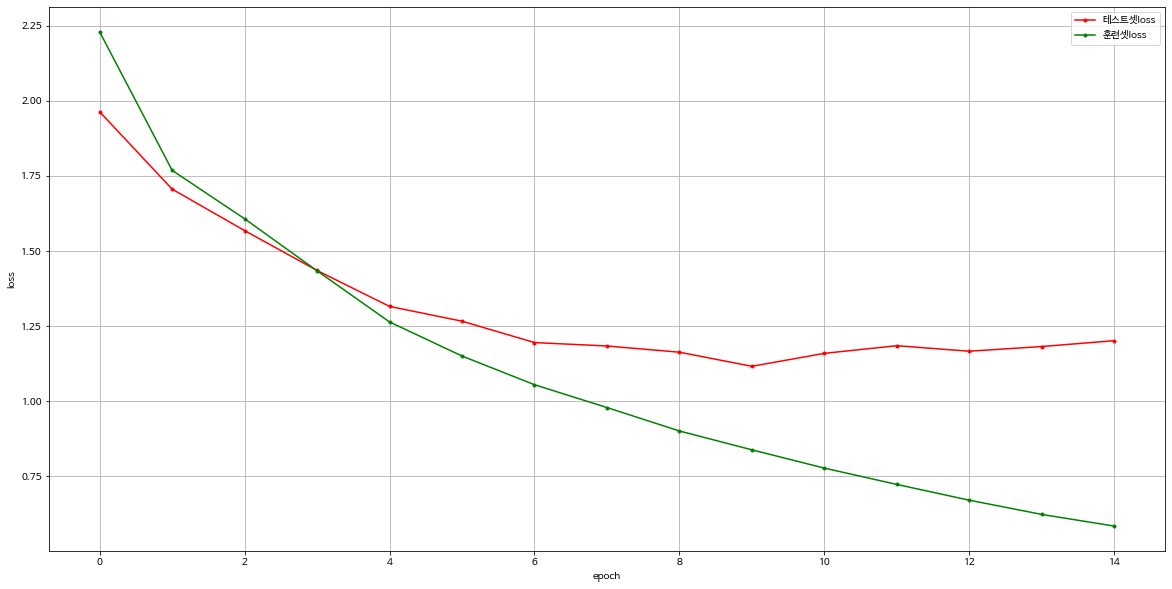

In [37]:
# 시각화
# 손실률

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='테스트셋loss')
plt.plot(x_len, y_loss, marker='.', c='green', label='훈련셋loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss');

In [ ]:
# 15번째에서 학습이 중단됨.
# 71.73% 의 정확도
# 테스트 데이터 오차가 상승할때 학습이 멈춤.



---



# 딥러닝 구조 - LSTM + CNN

In [38]:
# CNN : 커널을 통해 합성곱을 구하는 것
# 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분 제거
from tensorflow.keras.layers import MaxPool1D

# 오랫동안 학습이 진행될 수 있도록 한다.
from tensorflow.keras.layers import Dropout

In [39]:
# 모델 설정
model = Sequential()
model.add(Embedding(1000, 100))

model.add(Dropout(0.5))
# CNN
model.add(Conv1D(64, kernel_size=3))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))


model.add(LSTM(100))
model.add(Activation('tanh'))

# 출력층
model.add(Dense(46, activation= activation_function))
# 모델 실행옵션
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         100000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          19264     
                                                                 
 activation (Activation)     (None, None, 64)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, None, 64)          0         
                                                      

In [40]:
# 조기 중단 설정
es = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=es)

Epoch 1/200
450/450 [==============================] - 36s 76ms/step - loss: 2.1381 - accuracy: 0.4564 - val_loss: 1.7966 - val_accuracy: 0.5445
Epoch 2/200
450/450 [==============================] - 35s 78ms/step - loss: 1.6941 - accuracy: 0.5649 - val_loss: 1.6188 - val_accuracy: 0.5837
Epoch 3/200
450/450 [==============================] - 29s 65ms/step - loss: 1.5197 - accuracy: 0.6131 - val_loss: 1.5014 - val_accuracy: 0.6260
Epoch 4/200
450/450 [==============================] - 29s 64ms/step - loss: 1.3830 - accuracy: 0.6520 - val_loss: 1.4546 - val_accuracy: 0.6224
Epoch 5/200
450/450 [==============================] - 29s 65ms/step - loss: 1.2843 - accuracy: 0.6771 - val_loss: 1.3457 - val_accuracy: 0.6585
Epoch 6/200
450/450 [==============================] - 29s 63ms/step - loss: 1.2059 - accuracy: 0.6931 - val_loss: 1.2838 - val_accuracy: 0.6763
Epoch 7/200
450/450 [==============================] - 28s 62ms/step - loss: 1.1536 - accuracy: 0.7032 - val_loss: 1.2834 - val_ac

In [46]:
# 테스트 데이터 정확도
print('Test 정확도 : %.4f'%(model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 2s 21ms/step - loss: 1.1424 - accuracy: 0.7186
Test 정확도 : 0.7186


In [42]:
# 검증셋, 학습셋 오차를 저장
y_vloss2 = history.history['val_loss']
y_loss2 = history.history['loss']

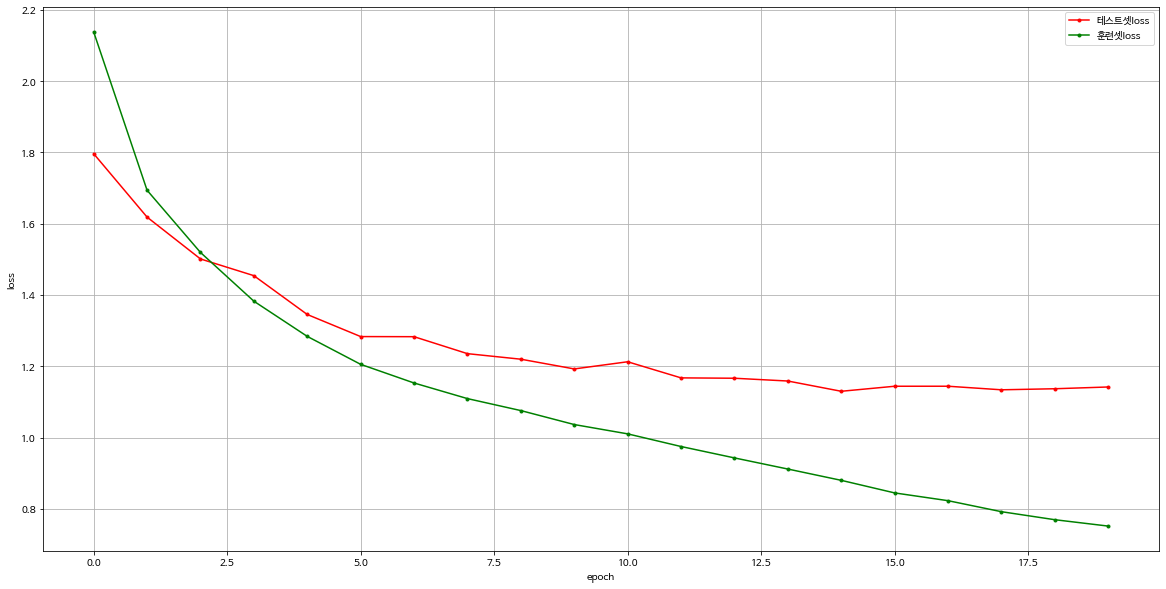

In [43]:
# 시각화
# 손실률

x_len = np.arange(len(y_loss2))
plt.plot(x_len, y_vloss2, marker='.', c='red', label='테스트셋loss')
plt.plot(x_len, y_loss2, marker='.', c='green', label='훈련셋loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss');